In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import collections
import math
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

In [3]:
path_project = './../'
path_pred = path_project + 'Results/'
path_real = path_project + 'ImagesStats/'

In [4]:
df_pred = pd.read_csv(path_pred + 'pred_SEATGURU_4.csv', sep=';')
df_real = pd.read_csv(path_real + 'g7_SEATGURU_annotate.csv', sep=';')


In [5]:
# prediction on Seatguru pictures
df_pred.rename(columns={'img': 'name', 'view' : 'view_pred'}, inplace=True)
df_pred

,name,view_pred,view_proba,manufacturer,manufacturer_proba,type,type_proba
0,Cathay_Pacific_Airways_Boeing_777-300ER_C_0.jpg,Meal,0.999996,NaN,NaN,NaN,NaN
1,KLM_Airbus_A330-300_1.jpg,Int,0.999998,Airbus,0.998750,A330,0.998699
2,American_Airlines_Boeing_767-300_3.jpg,Int,1.000000,Boeing,0.999102,777,0.998976
3,Air_Canada_Boeing_767-300ER_v2_3.jpg,Meal,0.999946,NaN,NaN,NaN,NaN
4,United_Airlines_Q400_A_2.jpg,Ext,0.999990,Boeing,NaN,757,0.446160
...,...,...,...,...,...,...,...
2551,Air_Canada_Airbus_A330_C_0.jpg,Int,0.999976,Airbus,0.999686,A320,0.604245
2552,Qatar_Airways_Airbus_A321_2.jpg,Int,0.999851,Airbus,0.997766,A321,0.380941
2553,Frontier_Airlines_Airbus_A320_4.jpg,Ext_Int,0.999627,NaN,NaN,NaN,NaN
2554,Spirit_Airlines_Airbus_A320_V2_3.jpg,Int,0.998991,Airbus,0.998399,A320,0.998727


In [6]:
# merge of the two dataframes
df = pd.merge(df_pred, df_real)
df

,name,view_pred,view_proba,manufacturer,manufacturer_proba,type,type_proba,format,height,width,height_to_width,ncol,aircraft_manufacturer,aircraft_type,view
0,Cathay_Pacific_Airways_Boeing_777-300ER_C_0.jpg,Meal,0.999996,NaN,NaN,NaN,NaN,jpg,540,960,0.5625,3,Boeing,777,Meal
1,KLM_Airbus_A330-300_1.jpg,Int,0.999998,Airbus,0.998750,A330,0.998699,jpg,720,960,0.7500,3,Airbus,A330,Int
2,American_Airlines_Boeing_767-300_3.jpg,Int,1.000000,Boeing,0.999102,777,0.998976,jpg,720,720,1.0000,3,Boeing,767,Int
3,Air_Canada_Boeing_767-300ER_v2_3.jpg,Meal,0.999946,NaN,NaN,NaN,NaN,jpg,720,960,0.7500,3,Boeing,767,Meal
4,United_Airlines_Q400_A_2.jpg,Ext,0.999990,Boeing,NaN,757,0.446160,jpg,720,960,0.7500,3,Other,NaN,Ext
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Air_Canada_Airbus_A330_C_0.jpg,Int,0.999976,Airbus,0.999686,A320,0.604245,jpg,720,960,0.7500,3,Airbus,A330,Int
2552,Qatar_Airways_Airbus_A321_2.jpg,Int,0.999851,Airbus,0.997766,A321,0.380941,jpg,720,960,0.7500,3,Airbus,A321,Int
2553,Frontier_Airlines_Airbus_A320_4.jpg,Ext_Int,0.999627,NaN,NaN,NaN,NaN,jpg,720,720,1.0000,3,Airbus,A320,Ext_Int
2554,Spirit_Airlines_Airbus_A320_V2_3.jpg,Int,0.998991,Airbus,0.998399,A320,0.998727,jpg,720,960,0.7500,3,Airbus,A320,Int


## Function to build confusion matrix

In [7]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() if normalize else cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Confusions matrix

### Confusion matrix for view model

In [8]:
y_true_view = list(df['view'])
y_pred_view = list(df['view_pred'])
labels_view=['Int', 'Ext', 'Ext_Int', 'Meal']
confusion_matrix_view = confusion_matrix(y_true_view, y_pred_view, labels = labels_view)

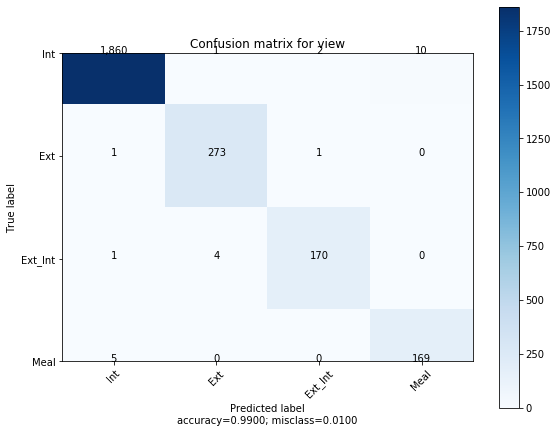

In [9]:
plot_confusion_matrix(confusion_matrix_view, labels_view, title = 'Confusion matrix for view' , normalize=False)

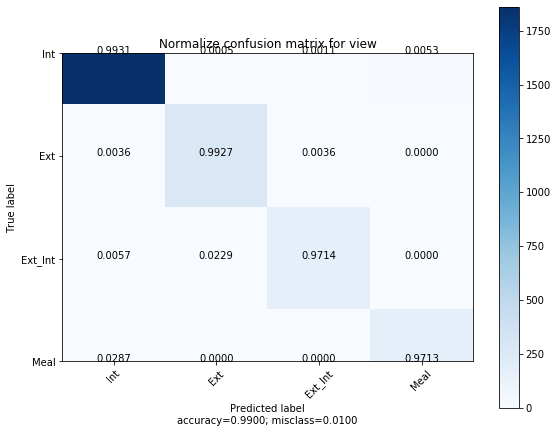

In [10]:
plot_confusion_matrix(confusion_matrix_view, labels_view, title = 'Normalize confusion matrix for view', 
                      normalize=True)

### Confusion matrix for exterior constructor

In [11]:
# real view = 'Ext'
df_ext = df.loc[df['view']=='Ext']
# confusion matrix for exterior
y_true_ext = list(df_ext['aircraft_manufacturer'])
y_pred_ext = list(df_ext['manufacturer'])
labels_ext_man=['Airbus', 'Boeing']

confusion_matrix_ext = confusion_matrix(y_true_ext, y_pred_ext, labels = labels_ext_man)

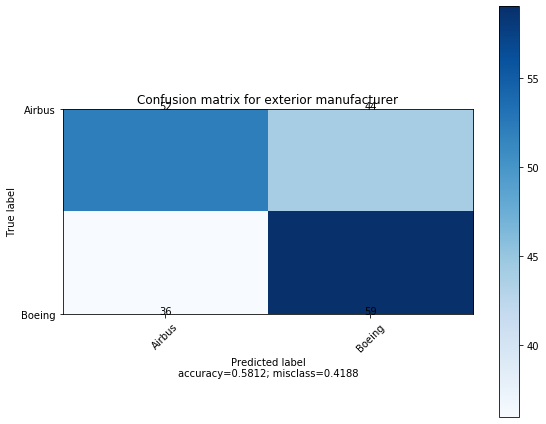

In [12]:
plot_confusion_matrix(confusion_matrix_ext, labels_ext_man, title = 'Confusion matrix for exterior manufacturer', 
                      normalize=False)

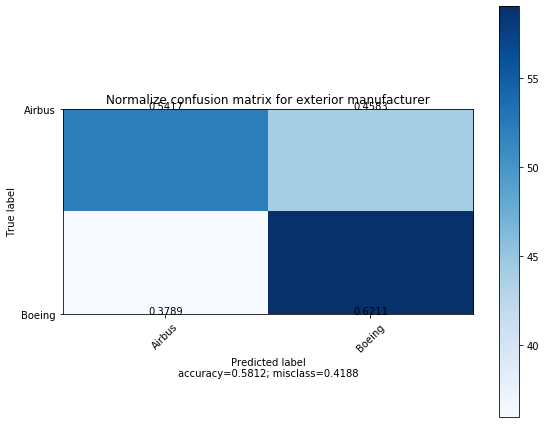

In [13]:
plot_confusion_matrix(confusion_matrix_ext, labels_ext_man, 
                      title = 'Normalize confusion matrix for exterior manufacturer' , normalize=True)

### Confusion matrix for exterior model (Airbus and Boeing)

In [18]:
# Creation of a new matrix which contains only models we want
df_col = list(df.columns)
df_constructeur_ext = pd.DataFrame(columns = df_col)

# Airplanes
labels_mod = list(df['type'].unique())
del labels_mod[0] # suppression nan
labels_mod = sorted(labels_mod)

# index of rows when aircraft type is in labels(models we want to keep)
list_ = list()
for i in range(len(df)):
    if df['aircraft_type'][i] in labels_mod:
        list_.append(i)

df_constructeur_ext = df.iloc[list_]
df_constructeur_ext = df_constructeur_ext.loc[df_constructeur_ext['view'] == 'Ext']

[nan, 'A330', '777', '757', 'A380', '787', 'A320', 'A340', 'A321', '737', 'A350', '747']
['A330', '777', '757', 'A380', '787', 'A320', 'A340', 'A321', '737', 'A350', '747']


In [19]:
# confusion matrix for exterior models
y_true_ext_mod = list(df_constructeur_ext['aircraft_type'])
y_pred_ext_mod = list(df_constructeur_ext['type'])
confusion_matrix_ext_mod = confusion_matrix(y_true_ext_mod, y_pred_ext_mod, labels = labels_mod)

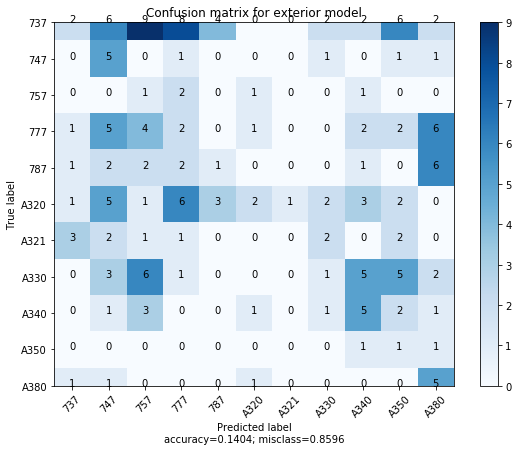

In [20]:
plot_confusion_matrix(confusion_matrix_ext_mod, labels_mod, 
                      title = 'Confusion matrix for exterior model' , normalize=False)

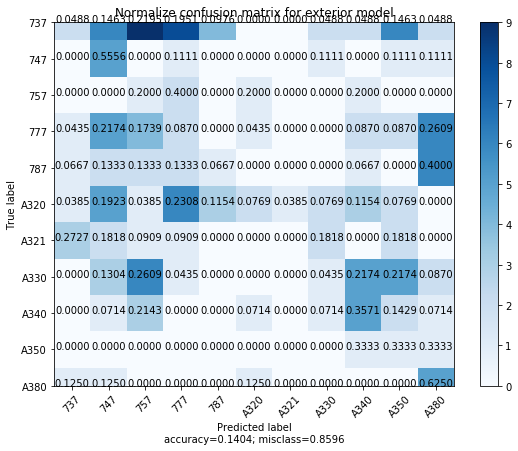

In [21]:
plot_confusion_matrix(confusion_matrix_ext_mod, labels_mod, 
                      title = 'Normalize confusion matrix for exterior model' , normalize=True)

### Confusion matrix for interior constructor

In [22]:
# real view = 'Int'
df_int = df.loc[df['view']=='Int']
# confusion matrix for exterior
y_true_int = list(df_int['aircraft_manufacturer'])
y_pred_int = list(df_int['manufacturer'])
labels_int_man=['Airbus', 'Boeing']

confusion_matrix_int = confusion_matrix(y_true_int, y_pred_int, labels = labels_int_man)

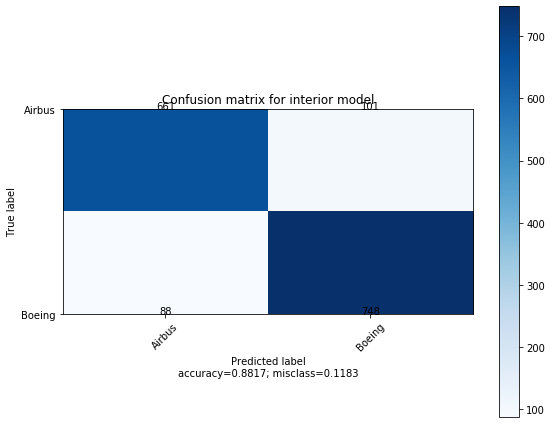

In [23]:
plot_confusion_matrix(confusion_matrix_int, labels_int_man, 
                      title = 'Confusion matrix for interior model' , normalize=False)

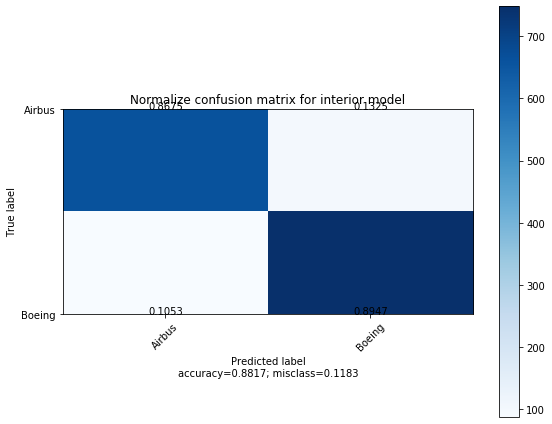

In [24]:
plot_confusion_matrix(confusion_matrix_int, labels_int_man, 
                      title = 'Normalize confusion matrix for interior model' , normalize=True)

### Confusion matrix for interior model (Airbus and Boeing)

In [27]:
# Creation of a new matrix which contains only models we want
df_col = list(df.columns)

# Airplanes
labels_mod_int = list(df['type'].unique())
del labels_mod_int[0] # suppression nan
labels_mod_int = sorted(labels_mod_int)

# index of rows when aircraft type is in labels(models we want to keep)
list_int = list()
for i in range(len(df)):
    if df['aircraft_type'][i] in labels_mod_int:
        list_int.append(i)

df_models_int = df.iloc[list_int]
df_models_int = df_models_int.loc[df_models_int['view'] == 'Int']

In [28]:
# confusion matrix for exterior models
y_true_int_mod = list(df_models_int['aircraft_type'])
y_pred_int_mod = list(df_models_int['type'])
confusion_matrix_int_mod = confusion_matrix(y_true_int_mod, y_pred_int_mod, labels = labels_mod_int)

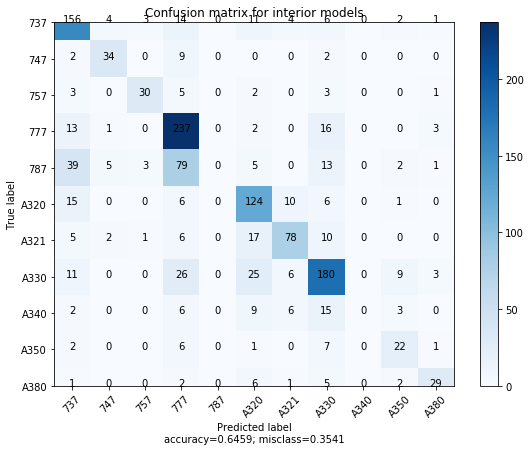

In [29]:
plot_confusion_matrix(confusion_matrix_int_mod, labels_mod_int, 
                      title = 'Confusion matrix for interior models' , normalize=False)

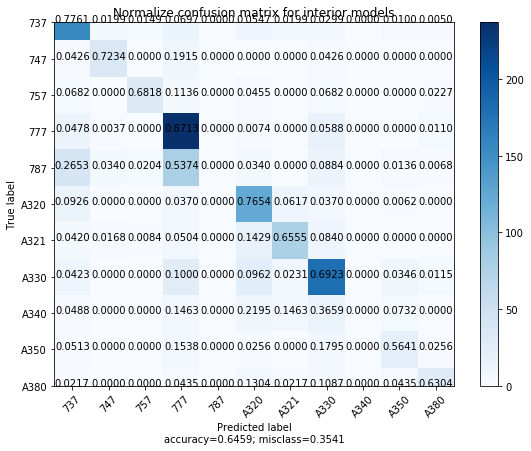

In [30]:
plot_confusion_matrix(confusion_matrix_int_mod, labels_mod_int, 
                      title = 'Normalize confusion matrix for interior models' , normalize=True)

# Precision/recall function

In [31]:
# count the number of true positive, false positive, true negative, false negative
def precision_recall(real_value, pred_value, val):
    nb_tp = 0
    nb_fn = 0
    nb_fp = 0
    nb_tn = 0
    
    for i in real_value.index:
        # True positive
        if real_value[i] == val and pred_value[i] == val:
            nb_tp += 1
        # False negative
        if real_value[i] == val and pred_value[i] != val :
            nb_fn +=1
        # False positive
        if real_value[i] != val and pred_value[i] == val:
            nb_fp += 1
        # True negative
        if real_value[i] != val and pred_value[i] != val:
            nb_tn += 1
    
    if nb_tp > 0 and nb_fp > 0:
        precision = nb_tp / (nb_tp + nb_fp)
    else:
        precision = 0
    if nb_tp > 0 and nb_tn > 0:
        recall = nb_tp / (nb_tp + nb_fn)
    else:
        recall = 0
    
    #return nb_tp
    return 'Class: ' + val, 'Precision ={:0.4f} , Recall = {:0.4f}'.format(precision, recall)

## First model : Int, Ext, Ext_Int, Meal

In [32]:
pr_int = precision_recall(df['view'], df['view_pred'], 'Int')

In [33]:
pr_ext = precision_recall(df['view'], df['view_pred'], 'Ext')

In [34]:
pr_ei = precision_recall(df['view'], df['view_pred'], 'Ext_Int')

In [35]:
pr_meal = precision_recall(df['view'], df['view_pred'], 'Meal')

## Exterior manufacturer : Airbus or Boeing

In [36]:
# Predict value = 'Ext'
df_ext = df.loc[df['view_pred'] == 'Ext']

# Airbus
pr_ext_airbus = precision_recall(df_ext['aircraft_manufacturer'], df_ext['manufacturer'], 'Airbus')

In [37]:
# Boeing
pr_ext_boeing = precision_recall(df_ext['aircraft_manufacturer'], df_ext['manufacturer'], 'Boeing')

## Exterior : Models of Airbus

In [38]:
df_ext_Airbus = df_ext.loc[df['manufacturer'] == 'Airbus']

In [39]:
# A320
pr_ext_A320 = precision_recall(df_ext_Airbus['aircraft_type'], df_ext_Airbus['type'], 'A320')

In [40]:
# A321
pr_ext_A321 = precision_recall(df_ext_Airbus['aircraft_type'], df_ext_Airbus['type'], 'A321')

In [41]:
# A330
pr_ext_A330 = precision_recall(df_ext_Airbus['aircraft_type'], df_ext_Airbus['type'], 'A330')

In [42]:
# A350
pr_ext_A350 = precision_recall(df_ext_Airbus['aircraft_type'], df_ext_Airbus['type'], 'A350')

## Exterior : Models of Boeing

In [43]:
df_ext_Boeing = df_ext.loc[df['manufacturer'] == 'Boeing']

In [44]:
# 737
pr_ext_737 = precision_recall(df_ext_Boeing['aircraft_type'], df_ext_Boeing['type'], '737')

In [45]:
# 747
pr_ext_747 = precision_recall(df_ext_Boeing['aircraft_type'], df_ext_Boeing['type'], '747')

In [46]:
# 757
pr_ext_757 = precision_recall(df_ext_Boeing['aircraft_type'], df_ext_Boeing['type'], '757')

In [47]:
# 777
pr_ext_777 = precision_recall(df_ext_Boeing['aircraft_type'], df_ext_Boeing['type'], '777')

## Interior manufacturer  : Airbus or Boeing

In [48]:
df_int = df.loc[df['view_pred'] == 'Int']

# Airbus
pr_int_airbus = precision_recall(df_int['aircraft_manufacturer'], df_int['manufacturer'], 'Airbus')

In [49]:
# Boeing
pr_int_boeing = precision_recall(df_int['aircraft_manufacturer'], df_int['manufacturer'], 'Boeing')

## Interior : Models of Airbus

In [50]:
df_int_Airbus = df_int.loc[df['manufacturer'] == 'Airbus']

In [51]:
# A320
pr_int_A320 = precision_recall(df_int_Airbus['aircraft_type'], df_int_Airbus['type'], 'A320')

In [52]:
# A321
pr_int_A321 = precision_recall(df_int_Airbus['aircraft_type'], df_int_Airbus['type'], 'A321')

In [53]:
# A330
pr_int_A330 = precision_recall(df_int_Airbus['aircraft_type'], df_int_Airbus['type'], 'A330')

In [54]:
# A350
pr_int_A350 = precision_recall(df_int_Airbus['aircraft_type'], df_int_Airbus['type'], 'A350')

## Interior : Models of Boeing

In [55]:
df_int_Boeing = df_int.loc[df['manufacturer'] == 'Boeing']

In [56]:
# 737
pr_int_737 = precision_recall(df_int_Boeing['aircraft_type'], df_int_Boeing['type'], '737')

In [57]:
# 747
pr_int_747 = precision_recall(df_int_Boeing['aircraft_type'], df_int_Boeing['type'], '747')

In [58]:
# 757
pr_int_757 = precision_recall(df_int_Boeing['aircraft_type'], df_int_Boeing['type'], '757')

In [59]:
# 777
pr_int_777 = precision_recall(df_int_Boeing['aircraft_type'], df_int_Boeing['type'], '777')

# HISTOGRAMMME

In [60]:
df.isnull().sum()

name                       0
view_pred                  0
view_proba                 0
manufacturer             369
manufacturer_proba       650
type                     369
type_proba               369
format                     0
height                     0
width                      0
height_to_width            0
ncol                       0
aircraft_manufacturer      0
aircraft_type            401
view                       0
dtype: int64

In [61]:
def histogramme(df, column, filter_1 = None, filter_2 = None, type_col = ['pred', 'real']):
    list_view = ['Int', 'Ext', 'Ext_Int', 'Meal']
    list_aircraftmanufacturer = ['Airbus', 'Boeing']
    list_aircrafttype = ['A320', 'A321', 'A330', 'A350','737', '747' '757', '777']
    hist = {}
    for i in range(len(df)):
        if df[column][i] in list_aircrafttype or df[column][i] in list_view or df[column][i] in list_aircraftmanufacturer :
            
            if filter_1 != None and type_col == 'pred' and df['view_pred'][i] == filter_1:
                if df[column][i] in hist :
                    hist[df[column][i]] += 1
                else :
                    hist[df[column][i]] = 1 
                    
            if filter_1 != None and type_col == 'real' and df['view'][i] == filter_1:
                if df[column][i] in hist :
                    hist[df[column][i]] += 1
                else :
                    hist[df[column][i]] = 1      
                    
            if filter_2 != None and type_col == 'pred' and df['manufacturer'][i] == filter_2 and filter_1 != None and type_col == 'pred' and df['view_pred'][i] == filter_1 :
                if df[column][i] in hist :
                    hist[df[column][i]] += 1
                else :
                    hist[df[column][i]] = 1
                    
                    
            if filter_2 != None and type_col == 'real' and df['aircraft_manufacturer'][i] == filter_2 and filter_1 != None and type_col == 'real' and df['view'][i] == filter_1:
                if df[column][i] in hist :
                    hist[df[column][i]] += 1
                else :
                    hist[df[column][i]] = 1
            
            if filter_1 == None and filter_2 == None :
                if df[column][i] in hist :
                    hist[df[column][i]] += 1
                else :
                    hist[df[column][i]] = 1
    return collections.OrderedDict(sorted(hist.items())) 

In [62]:
def affichage(histogramme, color = 'b'):
    plt.bar(histogramme.keys(), histogramme.values(), color = color)


### repartition view

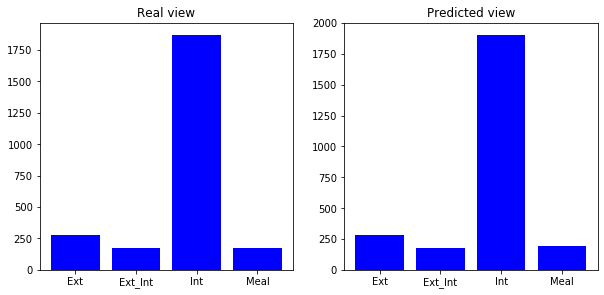

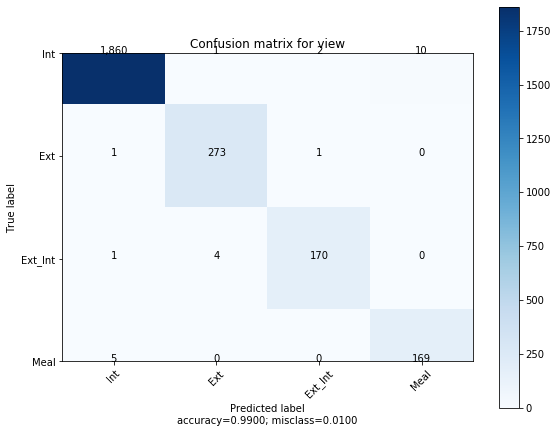

('Class: Int', 'Precision =0.9759 , Recall = 0.9931') 
 ('Class: Ext', 'Precision =0.9715 , Recall = 0.9927') 
 ('Class: Ext_Int', 'Precision =0.9551 , Recall = 0.9714') 
 ('Class: Meal', 'Precision =0.8848 , Recall = 0.9713')


In [96]:
plt.figure(figsize=(10,10))
plt.subplot(223)
affichage(histogramme(df, 'view'))#real
plt.title('Real view')
plt.subplot(224)
affichage(histogramme(df, 'view_pred')) #prediction
plt.title('Predicted view')
#plt.subplot(212)
plot_confusion_matrix(confusion_matrix_view, labels_view, title = 'Confusion matrix for view' , normalize=False)
print(pr_int, '\n', pr_ext, '\n', pr_ei, '\n', pr_meal)

### repartition exterior constructor

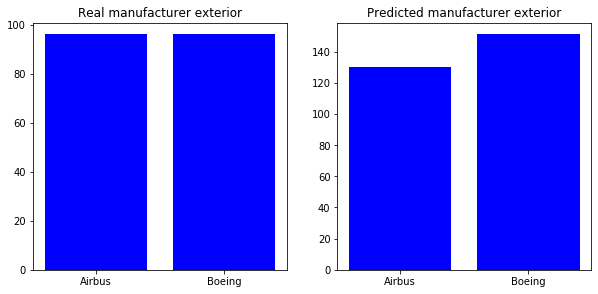

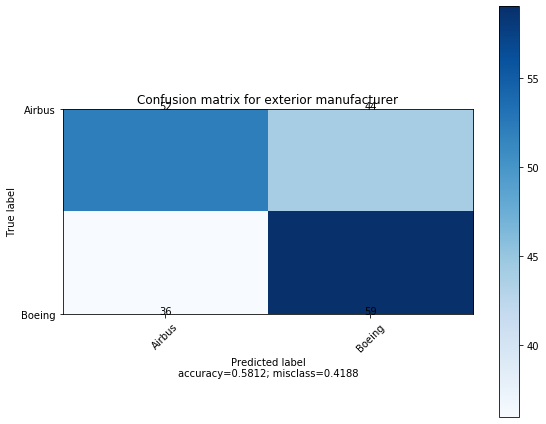

('Class: Airbus', 'Precision =0.4231 , Recall = 0.5446') 
 ('Class: Boeing', 'Precision =0.3907 , Recall = 0.6211')


In [103]:
plt.figure(figsize=(10,10))
plt.subplot(223)
affichage(histogramme(df, 'aircraft_manufacturer', filter_1 = 'Ext', type_col = 'real'))
plt.title('Real manufacturer exterior')
plt.subplot(224)
affichage(histogramme(df, 'manufacturer', filter_1 = 'Ext', type_col = 'pred'))
plt.title('Predicted manufacturer exterior')
#plt.subplot(212)
plot_confusion_matrix(confusion_matrix_ext, labels_ext_man, title = 'Confusion matrix for exterior manufacturer',
                      normalize=False)
print(pr_ext_airbus, '\n', pr_ext_boeing)

###  repartition modele exterior

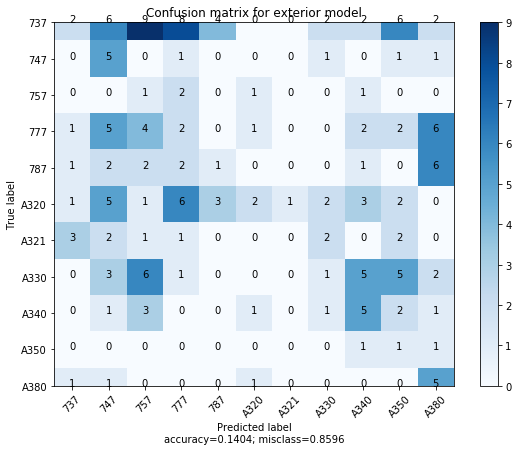

('Class: A320', 'Precision =0.2222 , Recall = 0.2000') 
 ('Class: A321', 'Precision =0.0000 , Recall = 0.0000') 
 ('Class: A330', 'Precision =0.0667 , Recall = 0.0714') 
 ('Class: A350', 'Precision =0.0345 , Recall = 0.3333') 
 ('Class: 737', 'Precision =0.1538 , Recall = 0.0690') 
 ('Class: 747', 'Precision =0.1111 , Recall = 0.8333') 
 ('Class: 757', 'Precision =0.0213 , Recall = 0.3333') 
 ('Class: 777', 'Precision =0.0690 , Recall = 0.1667')


In [108]:
plot_confusion_matrix(confusion_matrix_ext_mod, labels_mod,
                      title = 'Confusion matrix for exterior model' , normalize=False)
print(pr_ext_A320, '\n', pr_ext_A321, '\n', pr_ext_A330, '\n', pr_ext_A350, '\n',
      pr_ext_737, '\n', pr_ext_747, '\n', pr_ext_757, '\n', pr_ext_777)

### repartition interior constructor

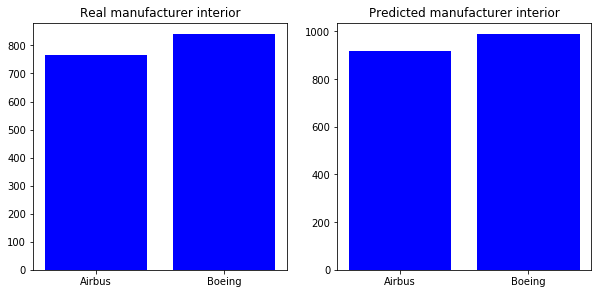

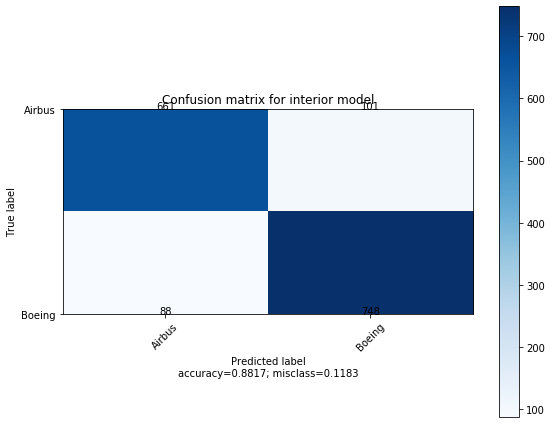

('Class: Airbus', 'Precision =0.7323 , Recall = 0.8628') 
 ('Class: Boeing', 'Precision =0.7690 , Recall = 0.8815')


In [105]:
plt.figure(figsize=(10,10))
plt.subplot(223)
affichage(histogramme(df, 'aircraft_manufacturer', filter_1 = 'Int', type_col = 'real'))
plt.title('Real manufacturer interior')
plt.subplot(224)
affichage(histogramme(df, 'manufacturer', filter_1 = 'Int', type_col = 'pred'))
plt.title('Predicted manufacturer interior')
plot_confusion_matrix(confusion_matrix_int, labels_int_man,
                      title = 'Confusion matrix for interior model' , normalize=False)
print(pr_int_airbus, '\n', pr_int_boeing )

### repartition modele interior

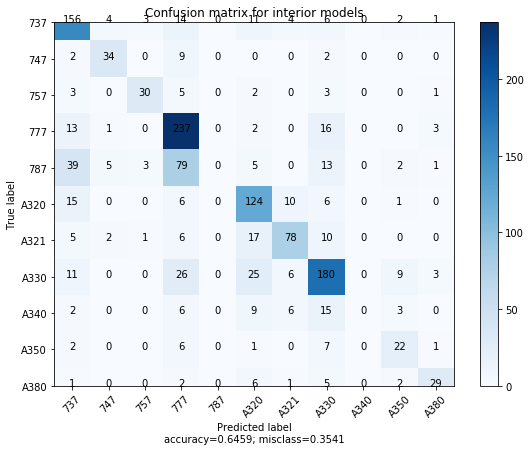

('Class: A320', 'Precision =0.3788 , Recall = 0.8681') 
 ('Class: A321', 'Precision =0.5270 , Recall = 0.7358') 
 ('Class: A330', 'Precision =0.5433 , Recall = 0.8018') 
 ('Class: A350', 'Precision =0.4151 , Recall = 0.6875') 
 ('Class: 737', 'Precision =0.4329 , Recall = 0.8778') 
 ('Class: 747', 'Precision =0.5484 , Recall = 0.7391') 
 ('Class: 757', 'Precision =0.6522 , Recall = 0.7500') 
 ('Class: 777', 'Precision =0.4630 , Recall = 0.9444')


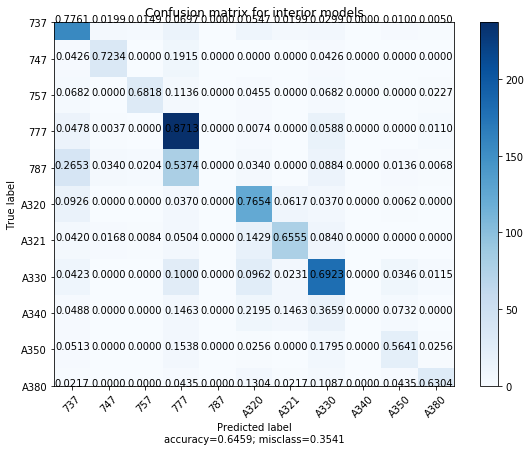

('Class: A320', 'Precision =0.3788 , Recall = 0.8681') 
 ('Class: A321', 'Precision =0.5270 , Recall = 0.7358') 
 ('Class: A330', 'Precision =0.5433 , Recall = 0.8018') 
 ('Class: A350', 'Precision =0.4151 , Recall = 0.6875') 
 ('Class: 737', 'Precision =0.4329 , Recall = 0.8778') 
 ('Class: 747', 'Precision =0.5484 , Recall = 0.7391') 
 ('Class: 757', 'Precision =0.6522 , Recall = 0.7500') 
 ('Class: 777', 'Precision =0.4630 , Recall = 0.9444')


In [107]:
plot_confusion_matrix(confusion_matrix_int_mod, labels_mod_int,
                      title = 'Confusion matrix for interior models' , normalize=False)
print(pr_int_A320, '\n', pr_int_A321, '\n',pr_int_A330, '\n', pr_int_A350, '\n',
      pr_int_737, '\n', pr_int_747, '\n',pr_int_757, '\n', pr_int_777)
plot_confusion_matrix(confusion_matrix_int_mod, labels_mod_int,
                      title = 'Confusion matrix for interior models' , normalize=True)
print(pr_int_A320, '\n', pr_int_A321, '\n',pr_int_A330, '\n', pr_int_A350, '\n',
      pr_int_737, '\n', pr_int_747, '\n',pr_int_757, '\n', pr_int_777)
